## Feature scaling means converting the value of features in dataframe into same scale,usually -1 to 1, so that it would be easy to analyze them together.For eg.If age is between 10 to 80 and salary is between 50000 to 100000.Then there would be huge difference between age and salary
# There are two types of Feature Scaling in case of numeric data.(But in categorical data we use encoding)
### 1) Standarization
### 2) Normalization

<h1 style = "color : blue;">1) Standarization</h1>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
df.drop(['User ID','Gender'],axis = 1,inplace=True) 

### axis=1 means column is being dropped & inplace = True means we want to make the change to actual dataframe i.e, df

In [18]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


<P style = "color : blue;">Note :</P> <b>BEFORE DOING FEATURE SCALING IT IS RECOMMENDED TO DO TRAIN TEST SPLIT<b>

In [26]:
from sklearn.model_selection import train_test_split

### Basically in train test split,our dataset is divided into two parts and further two.Dataset[Training set,Testing set].And 
### Training set is further divided into x-train,y-train and test set into x-test,y-test.X part basically contains 
### independent column and Y contains dependent column on X.
<h3 style = "color : red;">In simple way,X contains features and Y contains target</h3>

In [36]:
X = df[['Age','EstimatedSalary']] #This is feature
y = df['Purchased'] #This is target or label of dataset


X_train, X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.3,
                                                 random_state=0)

In [44]:
X_train.shape , X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [47]:
from sklearn.preprocessing import StandardScaler

In [116]:
scaler = StandardScaler()

In [118]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)
#The output will be in the form of np array

### <h3 style = "color : purple;"> Here, fit_transform firstly calculates the mean and standard deviation of X_train, and then it transforms X_train using these calculated values.Here,transform uses the mean and standard deviation calculated from X_train (during the fit step) to transform X_test. While developing the model,we want to fit the model to training dataset,not from the testing one.Otherwise our model will overfit to testing one <h3/>

In [121]:
X_train_scaled #This is in np array form but we want it in a dataframe form

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [123]:
X_train_scaled = pd.DataFrame(X_train_scaled , columns= X_train.columns)

### Here we are converting np array to dataframe.and in the resulting dataframe, if we dont pass "columns = X_train.columns" then columns values will be o and 1.So we replace that 0 and 1 with the X_train columns

In [126]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [128]:
np.round(X_train_scaled,1)

,Age,EstimatedSalary
0,-1.2,-1.6
1,2.2,0.9
2,0.0,1.2
3,0.2,1.1
4,0.4,-0.5
...,...,...
275,1.0,-1.2
276,-0.9,-0.8
277,-0.2,-0.5
278,-1.1,-0.5


In [134]:
X_train.mean() , X_train.std()

(Age                   37.864286
 EstimatedSalary    69807.142857
 dtype: float64,
 Age                   10.218201
 EstimatedSalary    34641.201654
 dtype: float64)

In [136]:
X_train_scaled.mean(), X_train_scaled.std()

(Age                3.489272e-17
 EstimatedSalary    6.344132e-17
 dtype: float64,
 Age                1.001791
 EstimatedSalary    1.001791
 dtype: float64)

## From above we can see that the we made approximate mean of X_train_scaled to be 0 and standard deviation to be 1.Initially it was larger as seen in just above cell

<Axes: title={'center': 'After Scaling'}, xlabel='Age', ylabel='Density'>

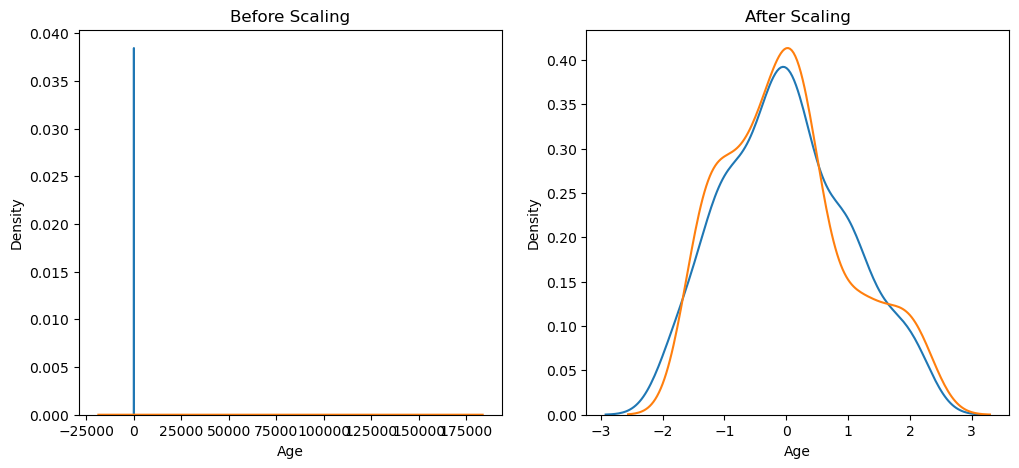

In [154]:
fig , (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))
'''
In fig , (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

plt.subplots(ncols=2, figsize=(12,5)) creates a figure with two subplots(named ax1 and ax2) arranged horizontally (ncols=2), with a specified size of 12 inches wide by 5 inches tall.
fig is the figure object, and (ax1, ax2) are the two subplot axes objects where the plots will be drawn.
'''

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1 )
sns.kdeplot(X_train['EstimatedSalary'] ,ax = ax1)

'''
ax1.set_title('Before Scaling') sets the title of the first subplot to "Before Scaling".
sns.kdeplot(X_train['Age'], ax=ax1) plots the Kernel Density Estimate for the Age column of the X_train DataFrame on the first subplot.
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1) plots the Kernel Density Estimate for the EstimatedSalary column on the same subplot.
Both KDE plots are drawn on ax1 to compare their distributions before scaling.
'''
#after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2 )
sns.kdeplot(X_train_scaled['EstimatedSalary'] ,ax = ax2)


#### Before scaling,since age variation is very very small interms of salary so we see both straight line,which makes it hard for us to analyze. <br> But After Scaling,Age and Salary have been in same range making us easy to analyze both

<h2 style = "color : red;">Note: Standarization doesnot mitigate the risk of outliers</h2>

<h2 style = "color : red;">Dont think twice while applying standarization in  K-Means,KNN,PCA,Artificial Neural Network,Gradient descent</h2>